# Monk Library - https://github.com/Tessellate-Imaging/monk_v1¶

### Monk is an opensource low-code tool for computer vision and deep learning


## Monk features

    low-code
    unified wrapper over major deep learning framework - keras, pytorch, gluoncv
    syntax invariant wrapper


## Enables

    to create, manage and version control deep learning experiments
    to compare experiments across training metrics
    to quickly find best hyper-parameters


## To contribute to Monk AI or Pytorch RoadMap repository raise an issue in the git-repo or dm us on linkedin

    Abhishek - https://www.linkedin.com/in/abhishek-kumar-annamraju/
    Akash - https://www.linkedin.com/in/akashdeepsingh01/

# Competition
 - https://www.hackerearth.com/challenges/competitive/hackerearth-deep-learning-challenge-auto-tag-images-gala/machine-learning/auto-tag-images-of-the-gala-9e47fb31/
 

### Score achieved with this tutorial: 83.54047


### Monk team's current rank: 15th (of 5000 participants), score 85.785

# Goals
    - Train a classifier on an expanded, manually augmented dataset
    - Use the final model from the first classifier as a pretrained model for the seond classifier
    - Train this second classifier on original training set
    - Compare the experiments
    - Run inference to generate test script


# Table of contents


## [0. Install Monk](#0)


## [1. Train on Augmented Set](#1)


## [2. Copy the experiment and train on Original Set](#2)


## [3. Compare the three experiments](#3)


## [4. Run inference using final model from 2nd experiment](#4)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 3552 (delta 80), reused 113 (delta 29), pack-reused 3352
Receiving objects: 100% (3552/3552), 106.96 MiB | 929.00 KiB/s, done.
Resolving deltas: 100% (2074/2074), done.
Checking out files: 100% (1454/1454), done.


In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

# Dataset
 - Credits: https://www.hackerearth.com/challenges/competitive/hackerearth-deep-learning-challenge-auto-tag-images-gala/machine-learning/auto-tag-images-of-the-gala-9e47fb31/

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1wUEvnf_x4hpCBXrdbSEFeG-Gyv_fOP3a' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1wUEvnf_x4hpCBXrdbSEFeG-Gyv_fOP3a" -O gala_dataset.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq gala_dataset.zip

<a id='1'></a>
# Experiment - 1 - On manually augmented data

In [2]:
import os
import sys
sys.path.append("monk_v1/monk/")

In [3]:
# Using Mxnet Backend
from gluon_prototype import prototype


# To use pytorch backend
#from pytorch_prototype import prototype


# To use keras backend
#from keras_prototype import prototype

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [4]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Experiment-On-Augmented-Data");

Mxnet Version: 1.5.0

Experiment Details
    Project: Project
    Experiment: Experiment-On-Augmented-Data
    Dir: /home/abhi/Downloads/hackerrank_cls/dataset/workspace/Project/Experiment-On-Augmented-Data/



## This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project (Project name can be different)
                    |
                    |
                    |-----Experiment-On-Augmented-Data
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)

##  Load the data and the model

  - Docs on  quick mode loading of data and model: https://github.com/Tessellate-Imaging/monk_v1#4

  - Tutorials on Monk: https://github.com/Tessellate-Imaging/monk_v1/tree/master/study_roadmaps/1_getting_started_roadmap

In [5]:
gtf.Default(dataset_path="dataset/Train_Images_Foldered", 
                    model_name="resnet152_v2", 
                    freeze_base_network=False, 
                    num_epochs=10);

Dataset Details
    Train path:     dataset/Train_Images_Foldered
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6383
    Num val images:   2736
    Num classes:      4

Model Params
    Model name:           resnet152_v2
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet152_v2
        Num of potentially trainable layers:  309
        Num of 

monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


### Docs on how to update hyper-parameters

  - Update hyperparams using update mode - https://clever-noyce-f9d43f.netlify.com/#/update_mode/update_dataset

  - Tutorials on how to update hyper-params - https://github.com/Tessellate-Imaging/monk_v1/tree/master/study_roadmaps/1_getting_started_roadmap/5_update_hyperparams

In [6]:
gtf.update_batch_size(12)
gtf.optimizer_sgd(0.01);
gtf.lr_multistep_decrease([7, 9]);
gtf.update_save_intermediate_models(False)


# Very important to reload post updates
gtf.Reload();

Update: Batch size - 12

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   multisteplr
    Params: {'step_size': 1, 'gamma': 0.1, 'last_epoch': -1, 'milestones': [7, 9]}

Update: Save Intermediate models - False

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6383
    Num val images:   2736
    Num classes:      4

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet152_v2
        Num of potentially trainable layers:  309
        Num of actual trainable layers:   

## Train

In [7]:
gtf.Train();

Training Start
    Epoch 1/10
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.713, Train-loss: 0.746 | Val-acc: 0.736477, Val-loss: 0.682, | time: 161.1 sec

    Epoch 2/10
    ----------




    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.831, Train-loss: 0.474 | Val-acc: 0.818713, Val-loss: 0.491, | time: 162.5 sec

    Epoch 3/10
    ----------




    curr_lr - 0.01
    [Epoch 3] Train-acc: 0.890, Train-loss: 0.312 | Val-acc: 0.831140, Val-loss: 0.485, | time: 163.2 sec

    Epoch 4/10
    ----------




    curr_lr - 0.01
    [Epoch 4] Train-acc: 0.915, Train-loss: 0.248 | Val-acc: 0.860380, Val-loss: 0.423, | time: 162.7 sec

    Epoch 5/10
    ----------




    curr_lr - 0.01
    [Epoch 5] Train-acc: 0.942, Train-loss: 0.167 | Val-acc: 0.863670, Val-loss: 0.463, | time: 163.1 sec

    Epoch 6/10
    ----------




    curr_lr - 0.01
    [Epoch 6] Train-acc: 0.954, Train-loss: 0.148 | Val-acc: 0.870249, Val-loss: 0.455, | time: 155.9 sec

    Epoch 7/10
    ----------




    curr_lr - 0.01
    [Epoch 7] Train-acc: 0.959, Train-loss: 0.123 | Val-acc: 0.872442, Val-loss: 0.463, | time: 155.4 sec

    Epoch 8/10
    ----------




    curr_lr - 0.001
    [Epoch 8] Train-acc: 0.976, Train-loss: 0.084 | Val-acc: 0.892178, Val-loss: 0.374, | time: 163.6 sec

    Epoch 9/10
    ----------




    curr_lr - 0.001
    [Epoch 9] Train-acc: 0.980, Train-loss: 0.063 | Val-acc: 0.897661, Val-loss: 0.356, | time: 165.1 sec

    Epoch 10/10
    ----------




    curr_lr - 0.0001
    [Epoch 10] Train-acc: 0.988, Train-loss: 0.043 | Val-acc: 0.895102, Val-loss: 0.356, | time: 166.7 sec

    Training completed in: 26m 44s
    Best val Acc:          0.897661

Training End

Training Outputs
    Model Dir:   /home/abhi/Downloads/hackerrank_cls/dataset/workspace/Project/Experiment-On-Augmented-Data/output/models/
    Log Dir:     /home/abhi/Downloads/hackerrank_cls/dataset/workspace/Project/Experiment-On-Augmented-Data/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

<a id='2'></a>
# Experiment - 2 - Further training on original data

In [8]:
from gluon_prototype import prototype

In [9]:
## Copy the previous experiment to use the final model of experiment 1 as pretrained model in experiment 2

In [10]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Experiment-On-Original-Data",
             copy_from=["Project", "Experiment-On-Augmented-Data"]);

Mxnet Version: 1.5.0

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6383
    Num val images:   2736
    Num classes:      4

Model Details
    Loading model - workspace/Project/Experiment-On-Augmented-Data/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Project
    Experiment: Experiment-On-Original-Data
    Dir: /home/abhi/Downloads/hackerrank_cls/dataset/workspace/Project/Experiment-On-Original-Data/



## This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project (Project name can be different)
                    |
                    |
                    |-----Experiment-On-Augmented-Data (Already created)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)
                     |
                     |
                     |-----Experiment-On-Original-Data (Created Now)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)

In [11]:
gtf.update_dataset(dataset_path="dataset/Train_Images",
                  path_to_csv="dataset/train.csv");

# Very important to reload post Updates
gtf.Reload();

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 5384
    Num val images:   599
    Num classes:      4



In [12]:
gtf.update_batch_size(16)
gtf.optimizer_sgd(0.001);
gtf.lr_multistep_decrease([8, 9]);
gtf.update_save_intermediate_models(False)


# Very important to reload post updates
gtf.Reload();

Update: Batch size - 16

Optimizer
    Name:          sgd
    Learning rate: 0.001
    Params:        {'lr': 0.001, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   multisteplr
    Params: {'step_size': 1, 'gamma': 0.1, 'last_epoch': -1, 'milestones': [8, 9]}

Update: Save Intermediate models - False



monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 5384
    Num val images:   599
    Num classes:      4



## Train

In [13]:
gtf.Train();

Training Start
    Epoch 1/10
    ----------




    curr_lr - 0.001
    [Epoch 1] Train-acc: 0.957, Train-loss: 0.153 | Val-acc: 0.951586, Val-loss: 0.134, | time: 125.3 sec

    Epoch 2/10
    ----------




    curr_lr - 0.001
    [Epoch 2] Train-acc: 0.970, Train-loss: 0.100 | Val-acc: 0.963272, Val-loss: 0.118, | time: 127.5 sec

    Epoch 3/10
    ----------




    curr_lr - 0.001
    [Epoch 3] Train-acc: 0.979, Train-loss: 0.073 | Val-acc: 0.966611, Val-loss: 0.110, | time: 122.8 sec

    Epoch 4/10
    ----------




    curr_lr - 0.001
    [Epoch 4] Train-acc: 0.976, Train-loss: 0.070 | Val-acc: 0.958264, Val-loss: 0.136, | time: 121.3 sec

    Epoch 5/10
    ----------




    curr_lr - 0.001
    [Epoch 5] Train-acc: 0.980, Train-loss: 0.057 | Val-acc: 0.959933, Val-loss: 0.131, | time: 122.7 sec

    Epoch 6/10
    ----------




    curr_lr - 0.001
    [Epoch 6] Train-acc: 0.983, Train-loss: 0.050 | Val-acc: 0.964942, Val-loss: 0.115, | time: 124.6 sec

    Epoch 7/10
    ----------




    curr_lr - 0.001
    [Epoch 7] Train-acc: 0.984, Train-loss: 0.045 | Val-acc: 0.968280, Val-loss: 0.102, | time: 127.3 sec

    Epoch 8/10
    ----------




    curr_lr - 0.001
    [Epoch 8] Train-acc: 0.987, Train-loss: 0.041 | Val-acc: 0.961603, Val-loss: 0.123, | time: 125.4 sec

    Epoch 9/10
    ----------




    curr_lr - 0.0001
    [Epoch 9] Train-acc: 0.985, Train-loss: 0.040 | Val-acc: 0.963272, Val-loss: 0.151, | time: 124.3 sec

    Epoch 10/10
    ----------




    curr_lr - 1e-05
    [Epoch 10] Train-acc: 0.987, Train-loss: 0.038 | Val-acc: 0.973289, Val-loss: 0.100, | time: 122.8 sec

    Training completed in: 20m 28s
    Best val Acc:          0.973289

Training End

Training Outputs
    Model Dir:   /home/abhi/Downloads/hackerrank_cls/dataset/workspace/Project/Experiment-On-Original-Data/output/models/
    Log Dir:     /home/abhi/Downloads/hackerrank_cls/dataset/workspace/Project/Experiment-On-Original-Data/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

<a id='3'></a>
# Compare experiments

In [14]:
# Invoke the comparison class
from compare_prototype import compare

### Creating and managing comparison experiments
  - Provide project name

In [15]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Analysis");

Comparison: - Analysis


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Analysis
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

## Add experiments

In [16]:
gtf.Add_Experiment("Project", "Experiment-On-Original-Data");
gtf.Add_Experiment("Project", "Experiment-On-Augmented-Data");

Project - Project, Experiment - Experiment-On-Original-Data added
Project - Project, Experiment - Experiment-On-Augmented-Data added


## Run Analysis

In [17]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Visualize comparisons

### Training Accuracy Curves

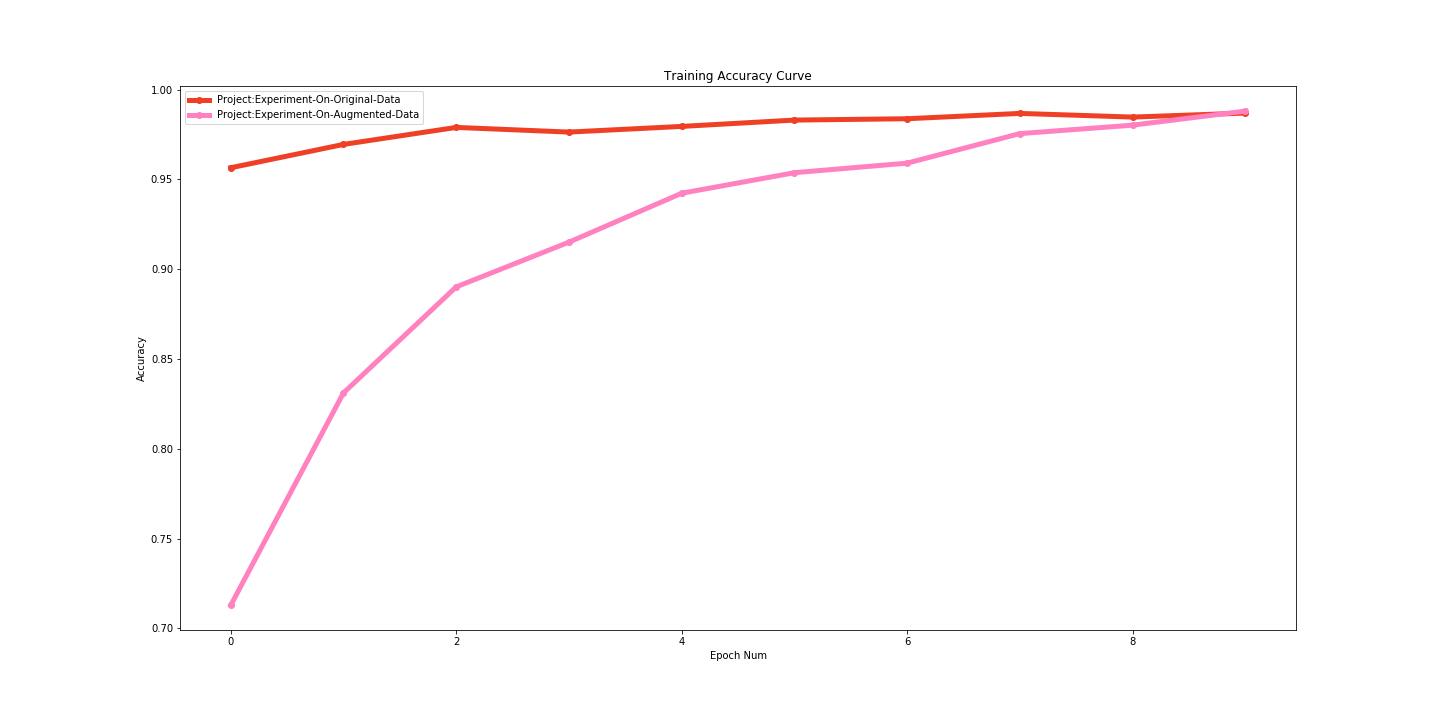

In [18]:
from IPython.display import Image
Image(filename="workspace/comparison/Analysis/train_accuracy.png") 

### Training Loss Curves

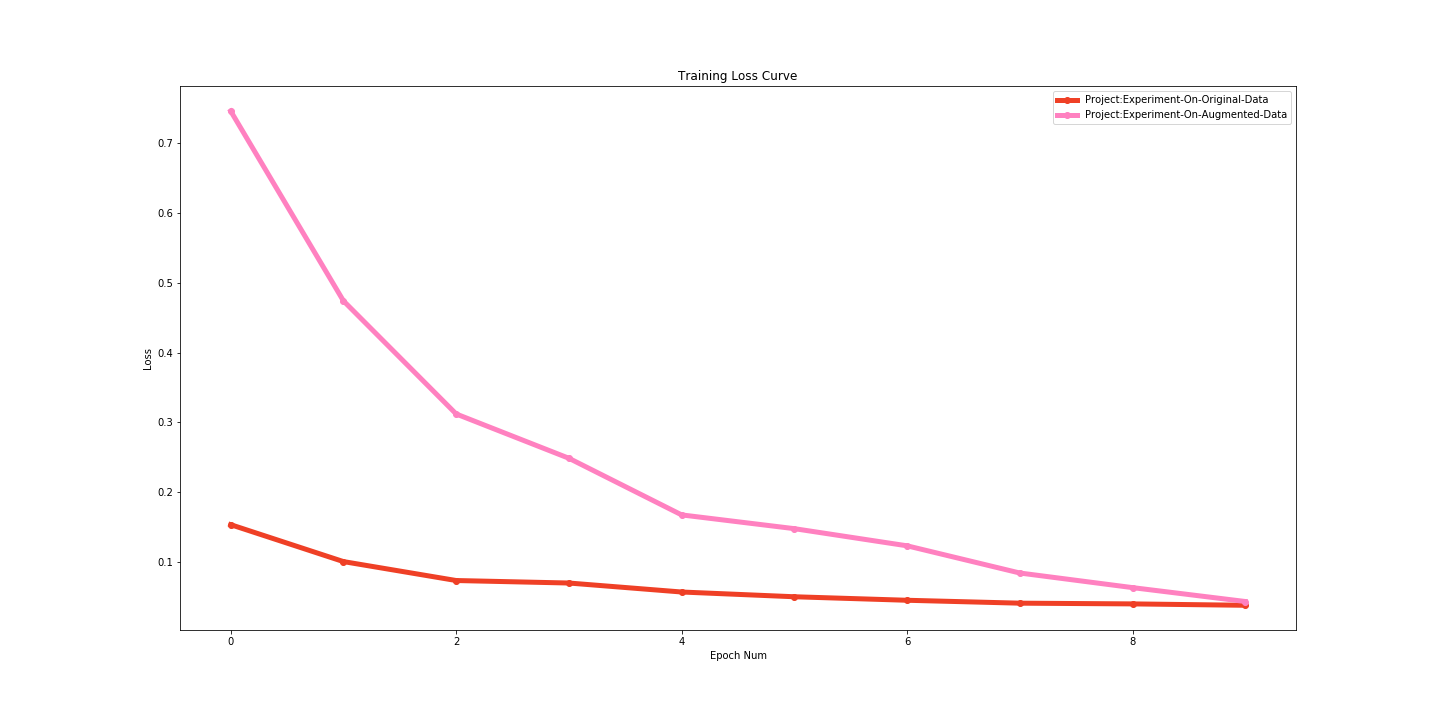

In [19]:
from IPython.display import Image
Image(filename="workspace/comparison/Analysis/train_loss.png") 

### Validation Accuracy Curves

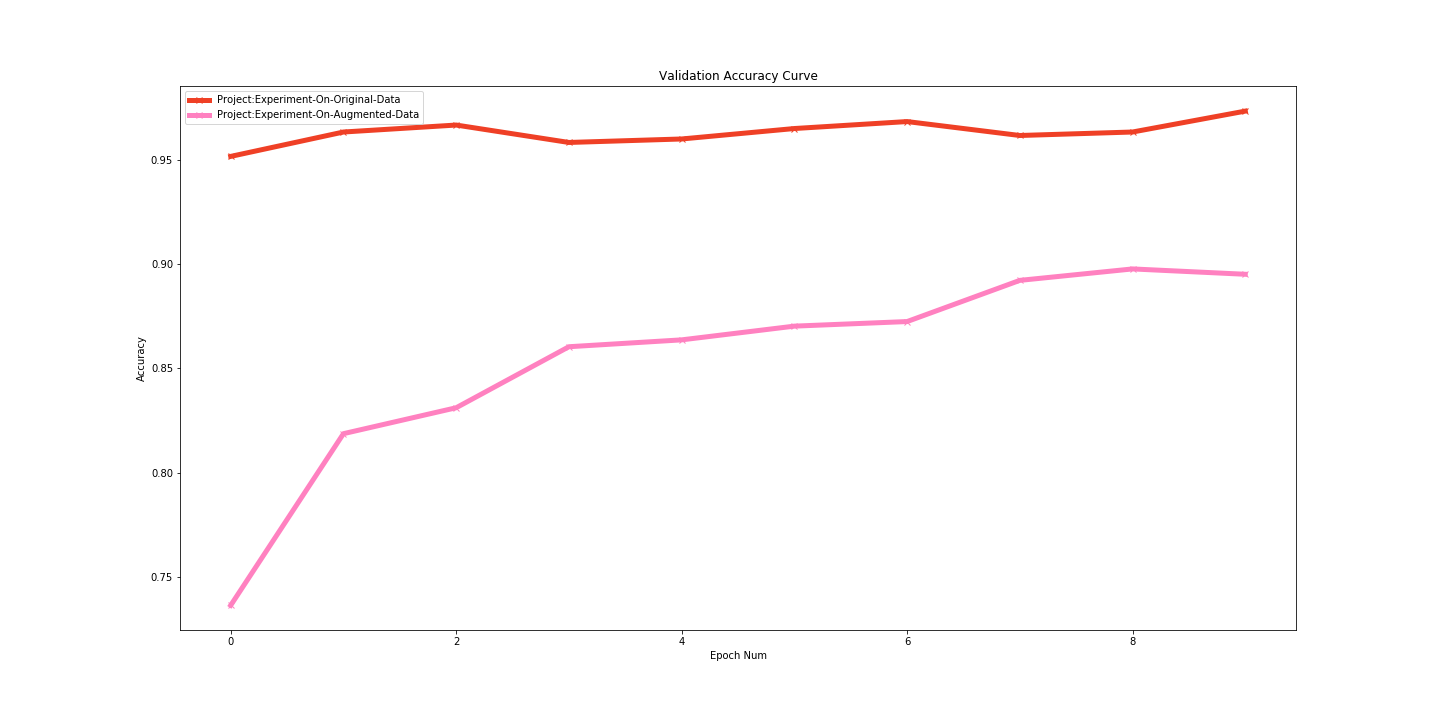

In [20]:
from IPython.display import Image
Image(filename="workspace/comparison/Analysis/val_accuracy.png") 

### Validation loss curves

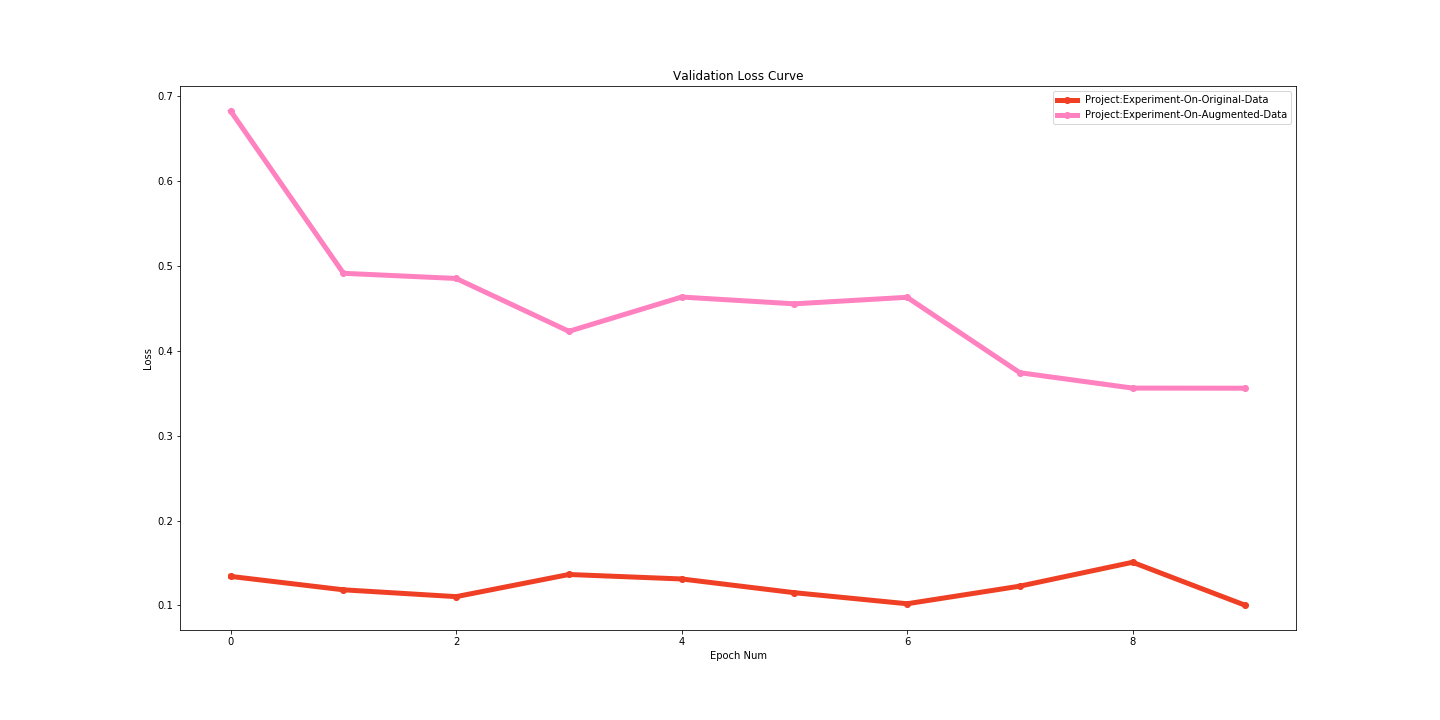

In [21]:
from IPython.display import Image
Image(filename="workspace/comparison/Analysis/val_loss.png")

### Training time curves

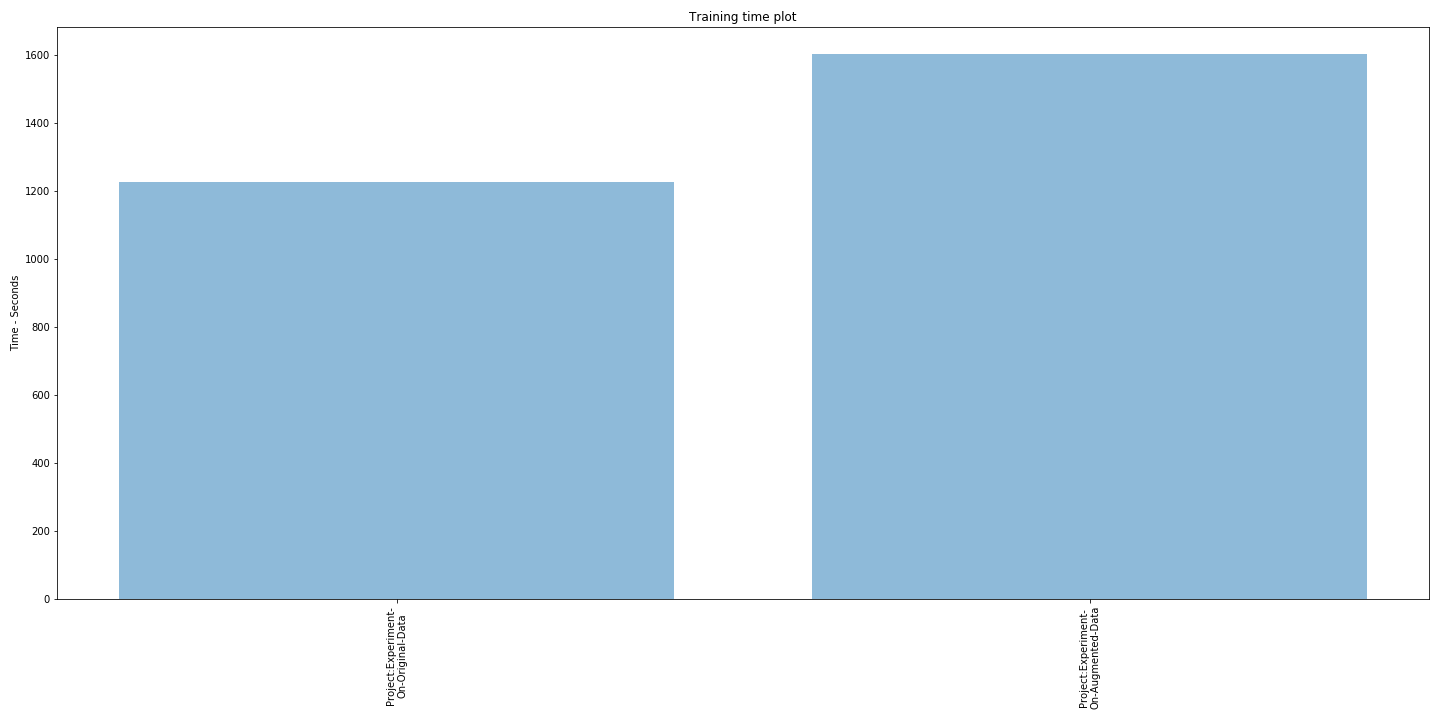

In [22]:
from IPython.display import Image
Image(filename="workspace/comparison/Analysis/stats_training_time.png") 

### Best Validation accuracies

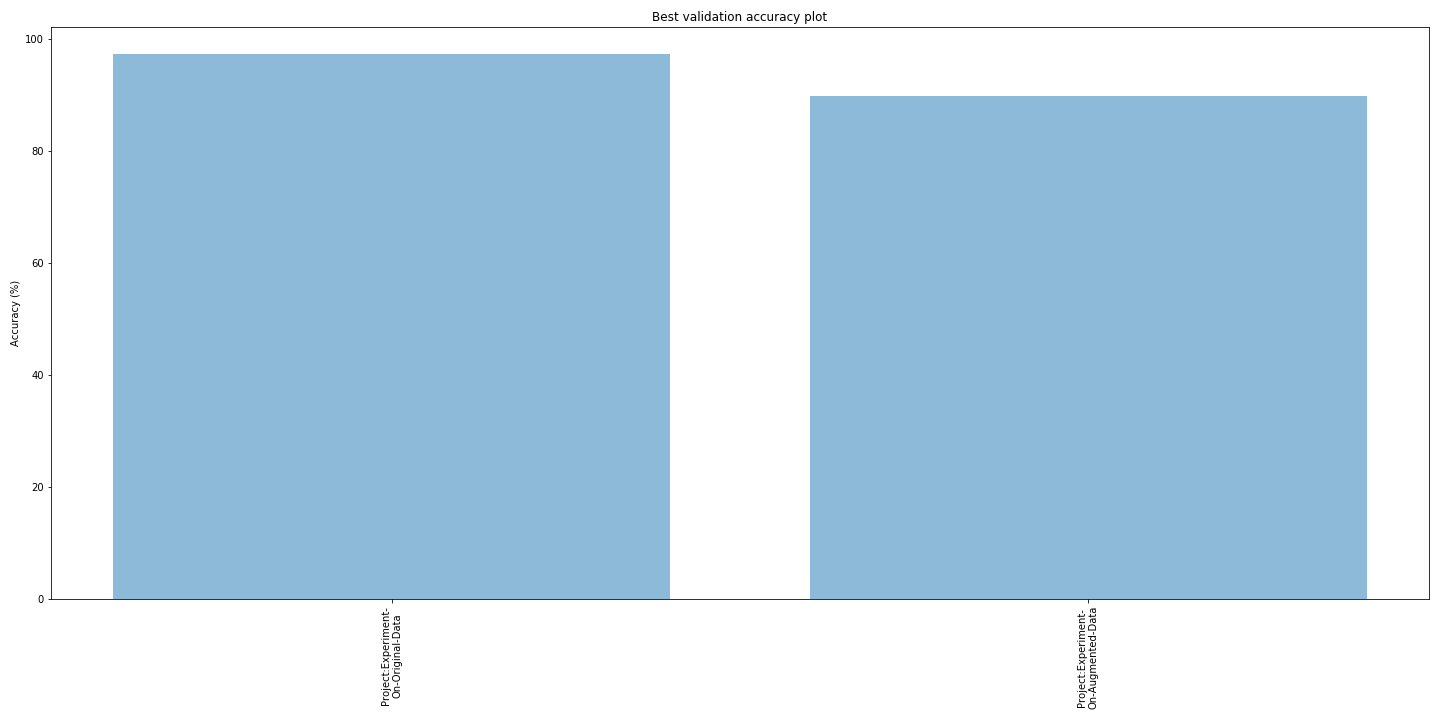

In [23]:
from IPython.display import Image
Image(filename="workspace/comparison/Analysis/stats_best_val_acc.png") 

<a id='4'></a>
# Inferencing on Experiment - 2

In [30]:
from gluon_prototype import prototype

gtf = prototype(verbose=0);

In [31]:
# To load experiment in evaluation mode, set eval_infer can be set as True
gtf.Prototype("Project", "Experiment-On-Original-Data", eval_infer=True);

In [32]:
import pandas as pd
df = pd.read_csv("dataset/test.csv");

In [33]:
columns = list(df.columns)
combined = [];
from tqdm import tqdm_notebook as tqdm

for i in tqdm(range(len(df))):
    img_name = df[columns[0]][i];
    
    #Monk inference Engine
    predictions = gtf.Infer(img_name="dataset/Test_Images/" + img_name, return_raw=False);
    
    combined.append([img_name, predictions['predicted_class']])

In [34]:
df = pd.DataFrame(combined, columns = ['Image', 'Class'])  

In [35]:
df.to_csv("submission.csv", index=False)